# MOVIE RATING PREDICTION

# Step 1: Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = pd.read_csv(r'IMDb Movies India.csv',encoding='latin1')

In [9]:
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)

# Step 2: EDA

In [13]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [11]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [23]:
data.dropna(subset=data.columns[1:9],how='all',inplace=True)
data.dropna(subset=['Name','Year'],how='all',inplace=True)
data.drop_duplicates(['Name','Year'],keep='first',inplace=True)

In [26]:
import math
import pandas as pd

# Drop rows with missing 'Year'
data.dropna(subset=['Year'], inplace=True)

# Convert 'Year' to numeric values if necessary
data['Year'] = data['Year'].str.extract(r'([0-9]{4})', expand=False)

# Convert 'Duration' to string, extract numeric part, and convert to numeric
data['Duration'] = data['Duration'].astype(str)
data['Duration'] = data['Duration'].str.extract(r'([0-9]+)', expand=False)
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')  # Convert to numeric, set errors='coerce' to handle non-numeric values

# Function to get mode with default value
def get_mode_with_default(x):
    mode_result = x.mode()
    if not mode_result.empty:
        return mode_result[0]
    else:
        return 'unknown'  

# Fill missing actor values based on mode
data['Actor 1'] = data['Actor 1'].fillna(data.groupby('Year')['Actor 1'].transform(get_mode_with_default))
data['Actor 2'] = data['Actor 2'].fillna(data.groupby('Year')['Actor 2'].transform(get_mode_with_default))
data['Actor 3'] = data['Actor 3'].fillna(data.groupby('Year')['Actor 3'].transform(get_mode_with_default))

# Fill missing director values based on combination of other features
data['Director'] = data.groupby(['Year', 'Actor 1', 'Actor 2', 'Actor 3'])['Director'].transform(get_mode_with_default)

# Handle missing values in 'Duration'
def get_mean_with_default(x):
    mean_result = x.mean()
    if not math.isnan(mean_result):
        return round(mean_result)
    else:
        return 0

data['Duration'] = data.groupby(['Year', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])['Duration'].transform(get_mean_with_default)


In [27]:
data['Rating']=data.groupby(['Director','Actor 1'])['Rating'].transform(lambda x:x.mean())
data['Rating']=data.groupby(['Director','Actor 2'])['Rating'].transform(lambda x:x.mean())
data['Rating']=data.groupby(['Director','Actor 3'])['Rating'].transform(lambda x:x.mean())
data['Rating']=data.groupby(['Year','Director'])['Rating'].transform(lambda x:x.mean())
data['Rating']=data.groupby('Year')['Rating'].transform(lambda x:x.mean())
data['Year']=pd.to_numeric(data['Year'])

data['Votes']=data['Votes'].str.extract(r'([0-9]+)',expand=False)
data['Votes']=pd.to_numeric(data['Votes'])

data['Votes']=data.groupby(['Year','Rating'])['Votes'].transform(lambda x:x.mean())

data['Votes']=data.groupby('Year')['Votes'].transform(lambda x:x.mean())

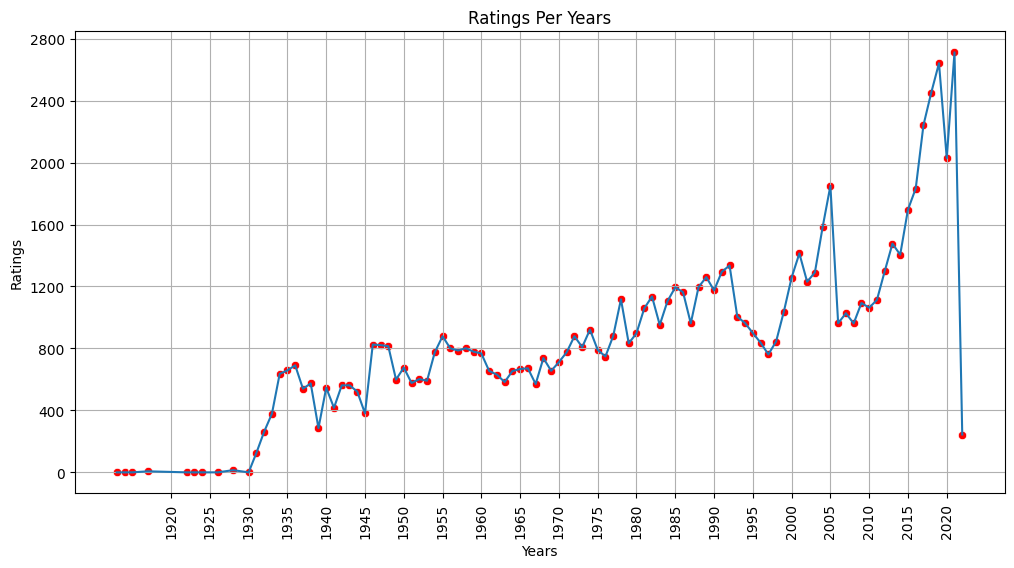

In [28]:
# Year with best rating
rating_sum=data.groupby('Year')['Rating'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Rating',data=rating_sum)
sns.scatterplot(x='Year',y='Rating',data=rating_sum,color='r')
plt.yticks(np.arange(0,3000,400))
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Ratings')
plt.xlabel('Years')
plt.title('Ratings Per Years')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

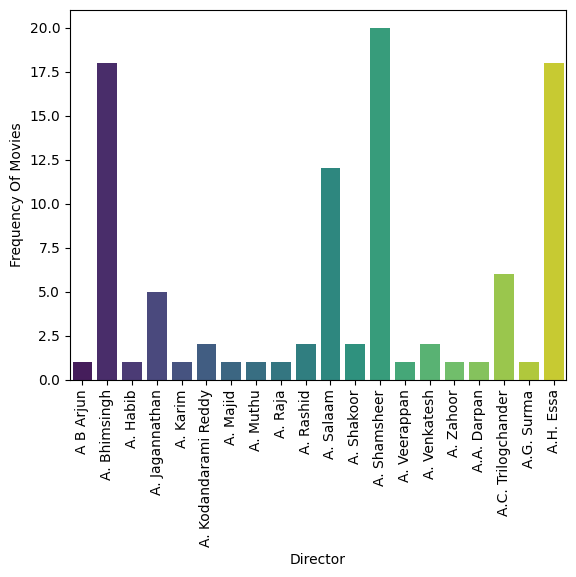

In [30]:
# Top 20 Directors by Frequency of Movies
top_20=data.groupby('Director')['Name'].count()[0:20]

sns.barplot(x=top_20.index,y=top_20.values,data=data,palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Frequency Of Movies')
plt.xlabel('Director')
plt.show()

In [31]:
def out(data,col,dis):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-(iqr*dis)
    upper=q3+(iqr*dis)
    return lower,upper
votes_low,votes_up=out(data,'Votes',1.5)
vote_out_count=(data['Votes'] > votes_up) | (data['Votes'] < votes_low)
data['Votes'][vote_out_count].count()
12
data=data[(data['Votes']>votes_low) & (data['Votes']<votes_up)]
year_low,year_upper=out(data,'Year',1.5)
year_out_count=(data['Year']>year_upper) | (data['Year']<year_low)
data['Year'][year_out_count].count()

0

<AxesSubplot:>

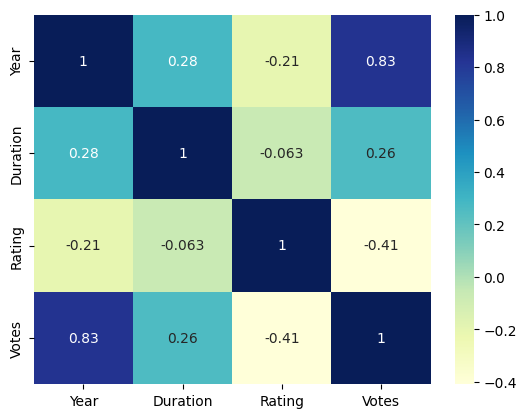

In [32]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

In [33]:
data=data[(data['Year']>year_low) &(data['Year']<year_upper)]
data.shape

(14908, 10)

In [37]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
data['Name']=LB.fit_transform(data['Name'])
data['Genre']=LB.fit_transform(data['Genre'])
data['Director']=LB.fit_transform(data['Director'])
data['Actor 1']=LB.fit_transform(data['Actor 1'])
data['Actor 2']=LB.fit_transform(data['Actor 2'])
data['Actor 3']=LB.fit_transform(data['Actor 3'])

# Step 3: Model Training

In [42]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.model_selection import train_test_split
x=data.drop('Rating',axis=1)
y=data['Rating']
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)
LR.fit(train_x,train_y)


LinearRegression()

# Step 4: Evaluate the model

In [41]:
pre_test=LR.predict(test_x)
pre_test
pre_train=LR.predict(train_x)

In [40]:
from sklearn.metrics import r2_score
score_test=r2_score(test_y,pre_test)
score_train=r2_score(train_y,pre_train)
print("print r2_score",score_test)
print('print r2_score',score_train)

print r2_score 0.2395000563981724
print r2_score 0.22445493917181525
